In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("data/houses_train.csv")

In [16]:
data.shape

(1460, 81)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
data[['GrLivArea', 'YearBuilt', 'SalePrice']]

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [13]:
data.filter(like='Bsmt').columns

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [ ]:
data[['YrSold', 'MoSold']] # 2008-02

,YrSold,MoSold
0,2008,2
1,2007,5
2,2008,9
3,2006,2
4,2008,12
...,...,...
1455,2007,8
1456,2010,2
1457,2010,5
1458,2010,4


In [21]:
def add_0_to_month(month: int) -> str:
  if month < 10:
    return "0"+ str(month)
  else:
    return str(month)
  
assert(add_0_to_month(10)=='10')
assert(add_0_to_month(2)=='02')


In [22]:
data['MoSold'] = data['MoSold'].apply(lambda month: add_0_to_month(month))

In [25]:
data['SaleDateStr'] = data['YrSold'].astype(str) + '-' + data['MoSold']

In [29]:
data['SaleDateStr'] = pd.to_datetime(data['SaleDateStr'])

In [30]:
data['SaleDateStr'].head(2)

0   2008-02-01
1   2007-05-01
Name: SaleDateStr, dtype: datetime64[ns]

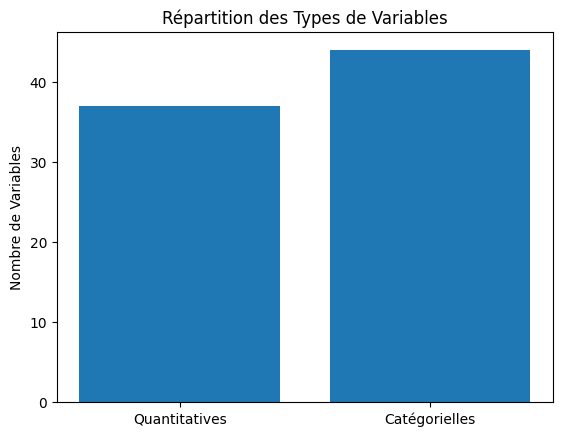

In [35]:
types_variables = {'Quantitatives': len(data.select_dtypes(include=['float', 'int']).columns),
                   'Catégorielles': len(data.select_dtypes(include=['object']).columns)}

plt.bar(types_variables.keys(), types_variables.values())
plt.title('Répartition des Types de Variables')
plt.ylabel('Nombre de Variables')
plt.show()

/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


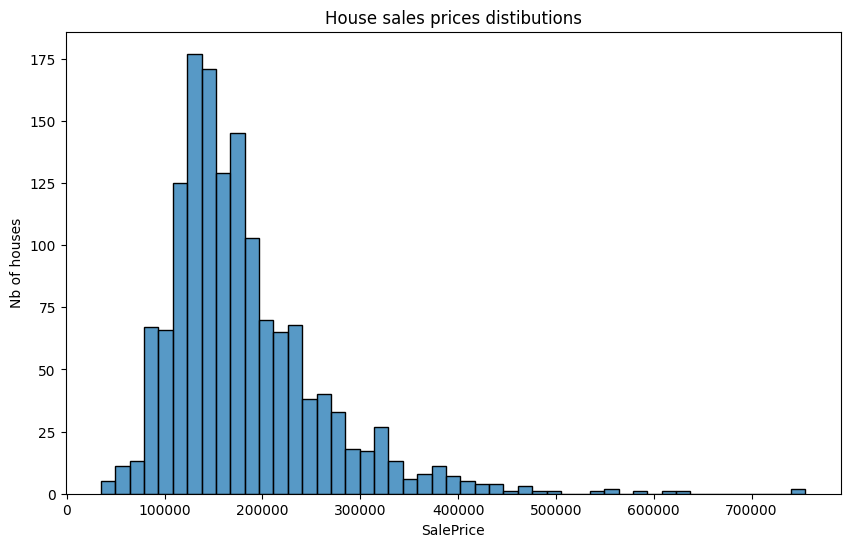

In [36]:
plt.figure(figsize=(10,6))
#plt.hist(data['SalePrice'], bins=30, edgecolor='black')
sns.histplot(data['SalePrice'])
plt.title('House sales prices distibutions')
plt.xlabel('SalePrice')
plt.ylabel('Nb of houses')
plt.show()

/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


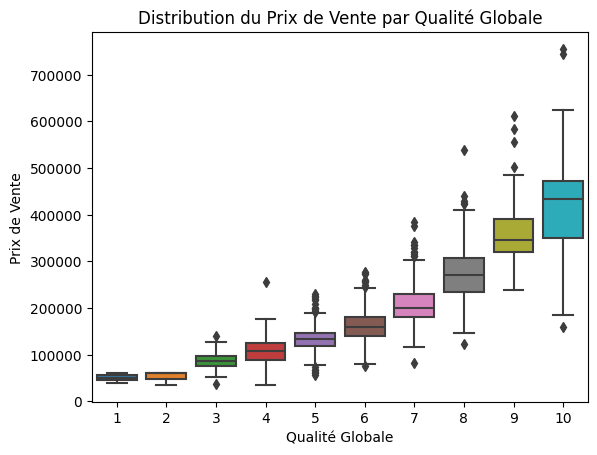

In [37]:
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.title('Distribution du Prix de Vente par Qualité Globale')
plt.xlabel('Qualité Globale')
plt.ylabel('Prix de Vente')
plt.show()